## Sustainable and Entrepreneurial Finance- Homework #2

### Question 1- Summary statistics


In [25]:
#Necessary libraries to run the code
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

#### Q1

Summary Statistics:


C:\Users\ameli\AppData\Local\Temp\ipykernel_7576\1628676722.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_e_scores = pd.read_excel(file_path_E_score , sheet_name="EUR", index_col=0, parse_dates=True)


,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,263.000000,266.000000,408.000000,494.000000,504.000000,524.000000,538.000000,556.000000,558.000000,566.000000,...,573.000000,580.000000,580.000000,581.000000,592.000000,601.000000,616.000000,619.000000,596.000000,530.000000
mean,28.040266,31.290789,27.743382,30.757996,32.791111,43.341317,50.235335,52.872374,55.735143,56.714682,...,57.660297,59.486345,60.657690,61.924613,62.304662,64.364110,65.259010,66.713780,67.884983,68.412321
std,24.205318,25.051157,25.332700,26.655877,26.930853,27.517217,27.745940,27.915140,26.463001,26.653054,...,25.930169,25.512855,24.776588,24.636621,24.692520,23.314416,22.655321,21.699438,21.091873,19.950315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.860000
25%,0.270000,5.635000,0.000000,4.220000,6.197500,20.925000,26.150000,31.425000,34.487500,35.270000,...,39.010000,40.855000,44.492500,45.080000,44.840000,48.540000,48.887500,51.565000,53.387500,56.910000
50%,27.080000,29.940000,25.605000,27.210000,29.165000,43.080000,50.830000,55.920000,58.470000,61.070000,...,60.200000,64.710000,64.165000,65.920000,66.810000,68.600000,69.665000,70.830000,71.935000,71.475000
75%,45.605000,51.962500,46.460000,50.082500,53.917500,65.082500,75.232500,77.907500,78.610000,79.522500,...,79.840000,80.817500,81.252500,82.390000,82.850000,83.340000,83.460000,84.245000,84.920000,84.052500
max,95.050000,96.590000,97.220000,97.630000,98.100000,98.370000,98.560000,98.940000,98.730000,98.740000,...,98.120000,98.240000,98.070000,98.910000,99.150000,98.660000,98.920000,98.980000,99.060000,98.130000


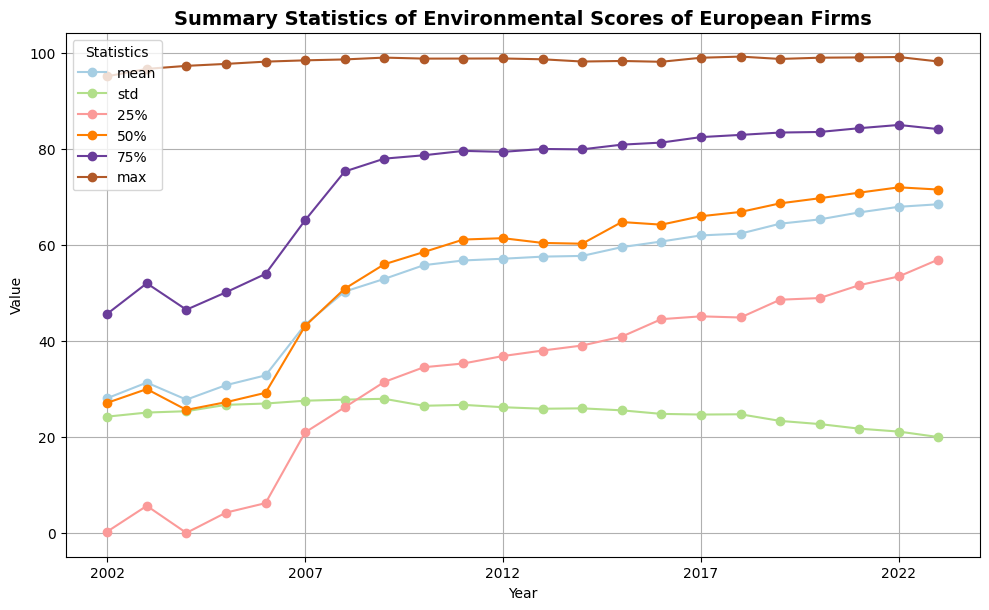

In [ ]:
file_path_E_score = r"data_h1/filtered_data\DS_EScore_Y.xlsx"
df_e_scores = pd.read_excel(file_path_E_score , sheet_name="EUR", index_col=0, parse_dates=True)

df_e_scores_filtered = df_e_scores.loc[:, 2002:2023]

# Summary statistics
summary_stats = df_e_scores_filtered.describe().T
print("Summary Statistics:")
display(summary_stats.T)


summary_stats.drop(columns=['count','min']).plot(kind='line', figsize=(10, 6), title='Summary Statistics', marker='o', colormap='Paired')
plt.xticks(rotation=0)
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Statistics", loc="upper left")
plt.xlabel("Year")
plt.title("Summary Statistics of Environmental Scores of European Firms", fontsize=14, fontweight="bold")
plt.show()



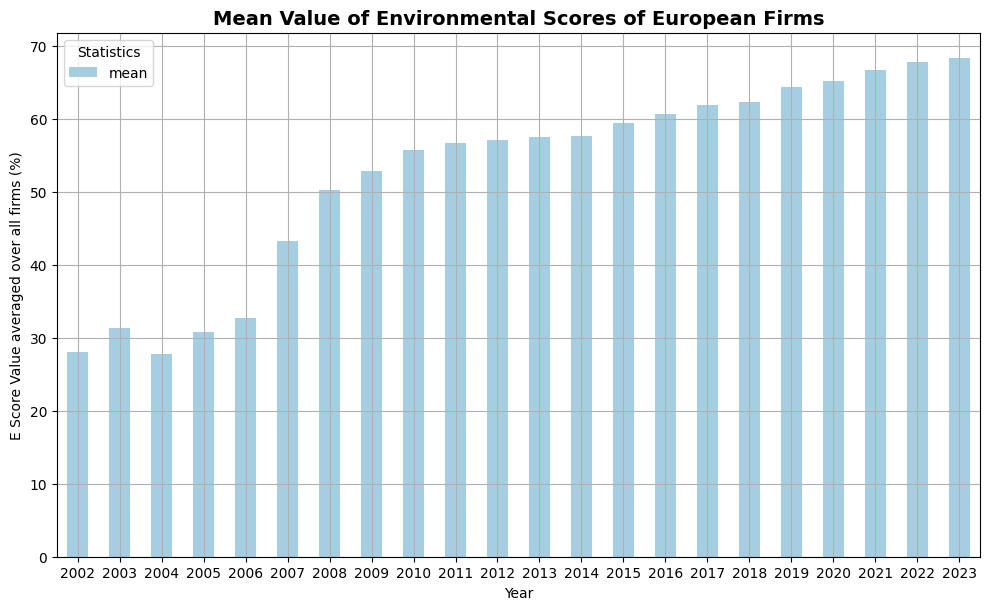

In [4]:
summary_stats['mean'].plot(kind='bar', figsize=(10, 6), title='Summary Statistics', colormap='Paired')
plt.xticks(rotation=0)
plt.ylabel('E Score Value averaged over all firms (%)')
plt.grid(True)
plt.tight_layout()
plt.legend(title="Statistics", loc="upper left")
plt.xlabel("Year")
plt.title("Mean Value of Environmental Scores of European Firms", fontsize=14, fontweight="bold")
plt.show()


In [5]:
# Find the firm with the maximal E score for each year
max_e_score_firms = df_e_scores_filtered.idxmax()
max_e_score_values = df_e_scores_filtered.max()

# Create a dataframe with the results
max_e_score_df = pd.DataFrame({
    'Year': max_e_score_firms.index,
    'Firm': max_e_score_firms.values,
    'Max E Score': max_e_score_values.values
})

print(max_e_score_df)

    Year              Firm  Max E Score
0   2002  MUENCHENER RUCK.        95.05
1   2003  MUENCHENER RUCK.        96.59
2   2004  MUENCHENER RUCK.        97.22
3   2005         UBS GROUP        97.63
4   2006         UBS GROUP        98.10
5   2007               AXA        98.37
6   2008          GENERALI        98.56
7   2009          GENERALI        98.94
8   2010          GENERALI        98.73
9   2011          GENERALI        98.74
10  2012          GENERALI        98.76
11  2013          GENERALI        98.59
12  2014         ABB LTD N        98.12
13  2015          GENERALI        98.24
14  2016          GENERALI        98.07
15  2017          GENERALI        98.91
16  2018         UBS GROUP        99.15
17  2019         UBS GROUP        98.66
18  2020        STOREBRAND        98.92
19  2021        STOREBRAND        98.98
20  2022        STOREBRAND        99.06
21  2023             SACYR        98.13


In [6]:
# Filter rows where any score is equal to 0
companies_with_zero_score = df_e_scores_filtered[df_e_scores_filtered.eq(0).any(axis=1)]

# Display the resulting dataframe
print("Companies with a score equal to 0:")
display(companies_with_zero_score)
# Filter rows where all scores are equal to 0
companies_with_only_zero_scores = df_e_scores_filtered[df_e_scores_filtered.eq(0).all(axis=1)]

# Display the resulting dataframe
print("Companies with only 0 scores:")
display(companies_with_only_zero_scores)

Companies with a score equal to 0:


,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
NAME,,,,,,,,,,,,,,,,,,,,,
VOESTALPINE,1.94,22.12,0.0,5.89,14.73,30.04,18.56,44.29,45.00,59.22,...,59.23,55.62,67.11,61.41,64.14,68.87,69.14,68.42,69.05,67.17
IMMOFINANZ,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,12.04,13.24,...,19.84,23.57,31.13,33.06,51.98,37.59,46.22,48.06,81.25,82.63
COFINIMMO,0.00,0.00,0.0,27.35,10.14,35.29,47.75,52.57,66.72,70.95,...,73.15,73.61,73.52,76.50,89.31,89.47,93.21,92.30,91.14,NaN
SOFINA,NaN,NaN,NaN,NaN,NaN,21.90,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,8.46,24.06,21.62,22.06
ORANGE BELGIUM,0.00,0.00,0.0,0.00,0.00,0.00,26.71,36.71,39.94,37.40,...,42.71,18.32,14.17,11.44,24.50,28.55,29.64,31.03,44.68,58.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HEXAGON B,NaN,NaN,NaN,0.00,0.00,0.00,31.47,23.81,30.74,25.42,...,18.09,22.63,25.97,26.00,23.50,44.70,51.80,70.51,65.54,69.52
MODERN TIMES GROUP MTG B,0.00,0.00,0.0,0.00,3.17,0.00,17.14,28.20,32.52,73.90,...,65.88,71.52,68.49,63.48,58.97,40.96,41.91,38.92,37.31,31.05
WIHLBORGS FASTIGHETER,NaN,NaN,NaN,0.00,15.17,52.75,45.73,54.42,61.85,68.14,...,59.99,72.87,69.28,61.10,59.17,59.14,63.82,59.14,49.81,47.34


Companies with only 0 scores:


,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
NAME,,,,,,,,,,,,,,,,,,,,,


In [24]:
file_path_E_score = r"data_h1/filtered_data\DS_EScore_Y.xlsx"
df_e_scores = pd.read_excel(file_path_E_score , sheet_name="EUR", index_col=0, parse_dates=True)

file_path_market_value= r"data_h1/filtered_data\DS_MV_T_USD_Y.xlsx"
df_market_value = pd.read_excel(file_path_market_value , sheet_name="EUR+ES", index_col=0, parse_dates=True)


file_path_yearly_returns= r"data_h1/filtered_data\DS_RI_T_USD_Y.xlsx"
df_returns_yearly = pd.read_excel(file_path_yearly_returns , sheet_name="EUR+ES", index_col=0, parse_dates=True)



C:\Users\ameli\AppData\Local\Temp\ipykernel_7576\1349301651.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_e_scores = pd.read_excel(file_path_E_score , sheet_name="EUR", index_col=0, parse_dates=True)
C:\Users\ameli\AppData\Local\Temp\ipykernel_7576\1349301651.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_market_value = pd.read_excel(file_path_market_value , sheet_name="EUR+ES", index_col=0, parse_dates=True)
C:\Users\ameli\AppData\Local\Temp\ipykernel_7576\1349301651.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_returns_yearly = pd.read_excel(file

### Q4


In [39]:
#Loading the files
returns_df = pd.read_excel("data_h1/filtered_data\DS_RI_T_USD_Y.xlsx", sheet_name="EUR+ES").set_index("ISIN").drop(columns=["NAME"])
cap_df = pd.read_excel("data_h1/filtered_data\DS_MV_USD_Y.xlsx", sheet_name="EUR+ES").set_index("ISIN").drop(columns=["NAME"])
e_df = pd.read_excel("data_h1/filtered_data\DS_EScore_Y.xlsx", sheet_name="EUR").set_index("ISIN").drop(columns=["NAME"])

#aligning the datasets and making sure the weights are corresponding to the right companies 
common_isins = returns_df.index.intersection(cap_df.index).intersection(e_df.index)
common_years = returns_df.columns.intersection(cap_df.columns).intersection(e_df.columns)

returns_df = returns_df.loc[common_isins, common_years].astype(float) / 100.0
cap_df = cap_df.loc[common_isins, common_years]
e_df = e_df.loc[common_isins, common_years]

# === Compute Benchmark Weights and ES Scores by Year ===
benchmark_weights_by_year = {}
e_scores_by_year = {}

for year in common_years:
    caps = cap_df[year]
    weights = (caps / caps.sum()).fillna(0)
    benchmark_weights_by_year[int(year)] = weights
    e_scores_by_year[int(year)] = e_df[year].fillna(0)

# === Run Optimisation for All Available Years ===
years = sorted(benchmark_weights_by_year.keys())
optimisation_results = {}

for year in years:
    w_iY = benchmark_weights_by_year[year]
    SC_iY = e_scores_by_year[year]

    SC_vw = np.dot(w_iY, SC_iY)

    def tracking_error(alpha):
        return np.dot(alpha - w_iY.values, alpha - w_iY.values)

    x0 = np.ones_like(w_iY) / len(w_iY)

    constraints = [
        {'type': 'eq', 'fun': lambda alpha: np.sum(alpha) - 1},
        {'type': 'ineq', 'fun': lambda alpha: np.dot(alpha, SC_iY.values) - 1.2 * SC_vw},
        {'type': 'ineq', 'fun': lambda alpha: alpha}
    ]

    result = minimize(tracking_error, x0, constraints=constraints, method='SLSQP')

    optimisation_results[year] = {
        "success": result.success,
        "message": result.message,
        "portfolio_weights": result.x if result.success else None,
        "benchmark_esg": SC_vw,
        "portfolio_esg": np.dot(result.x, SC_iY.values) if result.success else None,
        "tracking_error": tracking_error(result.x) if result.success else None
    }



<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ameli\AppData\Local\Temp\ipykernel_7576\1383637375.py:2: SyntaxWarning: invalid escape sequence '\D'
  returns_df = pd.read_excel("data_h1/filtered_data\DS_RI_T_USD_Y.xlsx", sheet_name="EUR+ES").set_index("ISIN").drop(columns=["NAME"])
C:\Users\ameli\AppData\Local\Temp\ipykernel_7576\1383637375.py:3: SyntaxWarning: invalid escape sequence '\D'
  cap_df = pd.read_excel("data_h1/filtered_data\DS_MV_USD_Y.xlsx", sheet_name="EUR+ES").set_index("ISIN").drop(columns=["NAME"])
C:\Users\ameli\AppData\Local\Temp\ipykernel_7576\1383637375.py:4: SyntaxWarning: invalid escape sequence '\D'
  e_df = pd.read_excel("data_h1/filtered_data\DS_EScore_Y.xlsx", sheet_name="EUR").set_index("ISIN").drop(

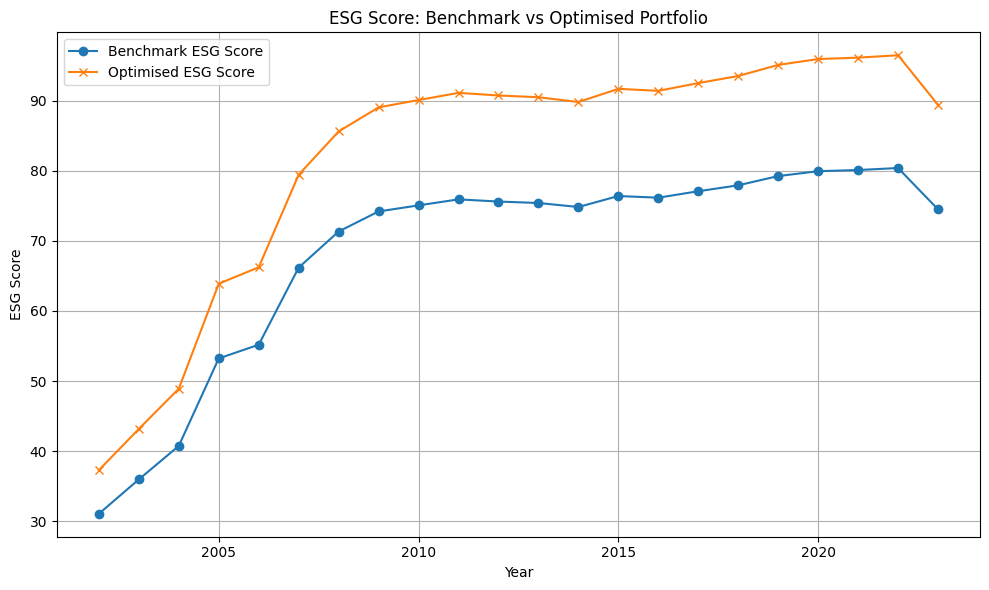

In [ ]:
# === Plot E Score Over Time ===
valid_years = [y for y in years if optimisation_results[y]["success"]]
filtered_years = [y for y in valid_years if y >= 2002]


benchmark_e = [optimisation_results[y]["benchmark_esg"] for y in filtered_years]
portfolio_e = [optimisation_results[y]["portfolio_esg"] for y in filtered_years]

plt.figure(figsize=(10, 6))
plt.plot(filtered_years, benchmark_e, label="Benchmark ESG Score", marker='o')
plt.plot(filtered_years, portfolio_e, label="Optimised ESG Score", marker='x')
plt.xlabel("Year")
plt.ylabel("E Score")
plt.title("E Score: Benchmark vs Optimised Portfolio")
plt.legend()
plt.grid(True)
plt.tight_layout()



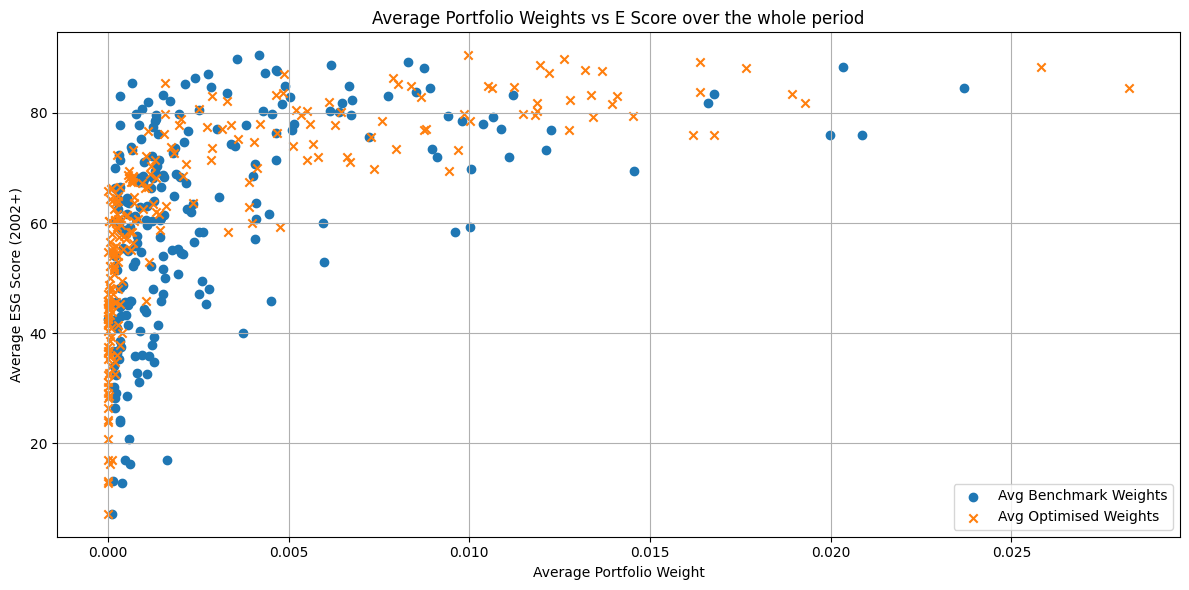

In [36]:
# Filter the years from 2002 onward

# Compute average weights and ESG scores over the full period
all_esg = e_df.loc[returns_df.index]
all_weights_opt = []
all_weights_bench = []

# Collect weights for years where optimisation succeeded
valid_years = [y for y in years if optimisation_results[y]["success"]]
filtered_years = [y for y in valid_years if y >= 2002]

# Recompute average weights and ESG scores for filtered years
all_weights_opt_filtered = []
all_weights_bench_filtered = []

for year in filtered_years:
    opt_weights = optimisation_results[year]["portfolio_weights"]
    bench_weights = benchmark_weights_by_year[year].loc[returns_df.index].values
    all_weights_opt_filtered.append(opt_weights)
    all_weights_bench_filtered.append(bench_weights)

# Convert to arrays and average
avg_opt_weights_filtered = np.mean(np.array(all_weights_opt_filtered), axis=0)
avg_bench_weights_filtered = np.mean(np.array(all_weights_bench_filtered), axis=0)
avg_esg_scores_filtered = np.mean(all_esg[filtered_years].values, axis=1)

# Sort by ESG scores
sorted_indices = np.argsort(avg_esg_scores_filtered)
esg_sorted = avg_esg_scores_filtered[sorted_indices]
opt_sorted = avg_opt_weights_filtered[sorted_indices]
bench_sorted = avg_bench_weights_filtered[sorted_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(bench_sorted, esg_sorted, label="Avg Benchmark Weights", marker='o')
plt.scatter(opt_sorted, esg_sorted, label="Avg Optimised Weights", marker='x')
plt.ylabel("Average ESG Score (2002+)")
plt.xlabel("Average Portfolio Weight")
plt.title("Average Portfolio Weights vs E Score over the whole period")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
